In [1]:
import numpy as np

In [87]:
X = [1, 2, 3, 4]
Y = np.array([1, 20, 30, 40])
a = 0.001

In [88]:
def scaling(x):
    def f(e):
        tmp0 = sum(x) / len(x)
        tmp1 = max(x) - min(x)
        return (e - tmp0) / tmp1
    return np.array(list(map(f, x)))
    
X_scaled = scaling(X)   
X_scaled

array([-0.5       , -0.16666667,  0.16666667,  0.5       ])

In [10]:
# Grad descent looking for h(x) to minimize cost func J (in notes)
def suma(x, y, f0, f1):
        n = len(x)
        cnt = 0
        s = 0
        while cnt < n:
            s = s + f0 + f1 * x[cnt] - y[cnt]
            cnt += 1
        return s
    
def suma1(x, y, f0, f1):
        n = len(x)
        cnt = 0
        s = 0
        while cnt < n:
            s = s + (f0 + f1 * x[cnt] - y[cnt]) * x[cnt]
            cnt += 1
        return s
def J(x, y, f0, f1):
    n = len(x)
    cnt = 0
    s = 0
    while cnt < n:
        s = s + (f0 + f1 * x[cnt] - y[cnt])**2
        cnt += 1
    return (1 / (2 * n)) * s
    

def g_d(x, y, alfa):
    af = np.array([0, 0])
    tmp = np.array([0,0])
    m = len(x)
    cnt = 0
    ma = alfa * (1 / m)
    delta = J(x, y, af[0], af[1])
    while delta > 0.00001:
        #print(af0, af1, ma, suma(X, Y, af0, af1), suma1(X, Y, af0, af1) )
        beg = J(x, y, af[0], af[1])
        tmp0 = af[0] - (ma *  suma(x, y, af[0], af[1]))
        tmp1 = af[1] - (ma * suma1(x, y, af[0], af[1]))
        af = np.array([tmp0, tmp1])
        cnt += 1
        end = J(x, y, af[0], af[1])
        delta = abs(end - beg)
        if cnt < 100000 and cnt > 99990:
            print(delta)
        #print(af, beg, end, cnt, af[0], af[1], tmp0, tmp1)
        #print(FI)
    return (af, cnt)

In [15]:
%time g_d(X, Y, a)


CPU times: user 492 ms, sys: 4 ms, total: 496 ms
Wall time: 496 ms


(array([ -8.36768686,  12.48493642]), 19626)

array([[1, 2, 6],
       [2, 4, 4],
       [3, 5, 5]])

In [197]:
B[:,1]

array([ 1.,  2.,  3.])

In [117]:
i = 0
while i < B.shape[1]:
    print(B[:, i])
    i += 1

[ 1.  1.  1.]
[ 1.  2.  3.]
[ 2.  4.  5.]
[ 3.  4.  5.]


# Multivariate Gradient Descent (Linear)

In [230]:
import matplotlib.pyplot as plt
#A = np.array([[1, 2, 6], [2, 4, 4], [3, 5, 5]])
#Y = np.array([6, 7, 9])
#X = np.c_[np.ones(3), A] # adding a column of ones to feature matrix
#alfa = 0.001
def scaling(x):
    def f(e):
        tmp0 = sum(x) / len(x)
        tmp1 = max(x) - min(x)
        return (e - tmp0) / tmp1
    return np.array(list(map(f, x)))
def scalling(X):
    def f(e):
        tmp

l_j = []
l_i = []    
def m_g_d(A, y, alfa):
    
    l = len(A)
    X = np.c_[np.ones(l), A]
    #tmp = np.zeros(X.shape[1])
    tmp = np.matrix([0,0,0], dtype=np.float64)
    #fi = np.zeros(X.shape[1])
    theta = np.matrix([0,0,0], dtype=np.float64)
    cnt = 0
    m = len(X)
    ma = alfa * (1 / m)
    delta = J_m(X, y, theta)
    while delta > 0.000001:
        beg = J_m(X, y, theta)
        for j in range(X.shape[1]):
            tmp[:,j] = theta[:,j] - ma * float((((X * theta.transpose()) - y.transpose()).transpose()) * X[:,j])
        theta = tmp
        end = J_m(X, y, theta)
        l_j.append(end)
        l_i.append(cnt)
        delta = abs(end - beg)
        #print("delta in loop ", delta, beg, end, ma * float((((X * fi.transpose()) - y.transpose()).transpose()) * X[:,j]))
        #print("fi in a loop, j ", fi, j)
        cnt += 1
    return (theta, cnt, end)

def J_m(A, y, theta):
    n = len(A)
    return (1 / (2 * n)) * float(sum([x * x for x in A * theta.transpose() - y.transpose()]))

[[ 1.00005  0.       0.     ]]
CPU times: user 7.22 s, sys: 0 ns, total: 7.22 s
Wall time: 7.23 s
(matrix([[ 1.2789539 ,  0.63941301,  0.63939703]]), 21323, 0.003332632558852946)


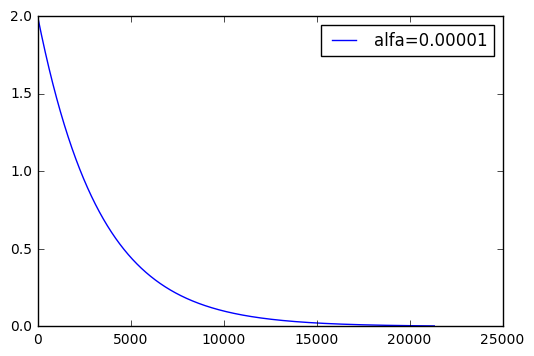

In [229]:
y = np.matrix([2, 2], dtype=np.float64)
fi2 = np.matrix([0,0,0], dtype=np.float64)
T1 = np.matrix([[0.5, 0.5], [0.5, 0.5]], dtype=np.float64)
X2 = np.c_[np.ones(2), T1]
tmp22= np.matrix([0,0,0], dtype=np.float64)
#print(X2)
#print(len(T1))
#print("shape X2 ", X2.shape)
#print(np.zeros(X2.shape[1]))
#M = T1 * fi2.transpose() - y.transpose()
tmp22[:,0] = fi2[:,0] + 1.00005
print(tmp22)
#(1 / (2 * len(T1))) * float(sum([x * x for x in M]))
#print(tmp[:,2])
#J_m(X2, y, fi2)
%time out = m_g_d(T1, y, 0.0001)
print(out)
plt.plot(l_i, l_j, color="blue", linewidth=1, label="alfa=0.00001")
plt.legend(loc="upper right")
plt.show()
#(matrix([[ 0.61223704,  0.30611546,  0.30611469]]), 167022)

In [255]:
a1 = np.matrix([[1,2], [3,4]])
a = np.c_[np.ones(2), a1]
b = np.matrix([3, 3, 3])
y = np.matrix([5,6])
tes1 = np.matrix([0, 0])
#print(type(a))
#print(a[:,:])
#print(a.shape[1])
#float((((a * b.transpose()) - y.transpose()).transpose()) * a[:,0])
#np.c_[np.ones(2), a]
#np.matrix(list(map(lambda x : x * x, a1[:, 0])))
ll = []
mat  = list(map(int, (list(map(lambda x : x * x, a1[:, 0])))))
mat2 = np.matrix(mat)
ll.append(mat)
ll.append(mat)
np.matrix(ll).transpose()

matrix([[1, 1],
        [9, 9]])

In [259]:
a1[:,0]


matrix([[1],
        [3]])

In [99]:
x1 = np.array([[1, 2], [3, 4]])
y1 = np.array([5, 6])
X1 = np.c_[np.ones(2), x1]
fi1 = np.array([3, 3, 3])
print(len(y1))
print(X1[:, :])
print(Sum(fi1, X1, y1, 0))

#(fi1.dot(X1[1,:]) - y1[1]) * X1[1,0]


2
[[ 1.  1.  2.]
 [ 1.  3.  4.]]
7.0 [3 3 3] 0 0
25.0 [3 3 3] 1 0
25.0


25.0

In [5]:
i = 0
s = 0
while i < 3:
    s = s + A[i,:].dot(np.ones(3))
    i += 1
s 

32.0

In [21]:
X

array([[ 1.,  1.,  2.,  6.],
       [ 1.,  2.,  4.,  4.],
       [ 1.,  3.,  5.,  5.]])

In [22]:
X[0, :]

array([ 1.,  1.,  2.,  6.])

In [47]:
test = np.array(range(1, 5))
test2 = np.array(range(6, 10))
test3 = np.zeros(4)
X
print(test3)
X

[ 0.  0.  0.  0.]


array([[ 1.,  1.,  2.,  6.],
       [ 1.,  2.,  4.,  4.],
       [ 1.,  3.,  5.,  5.]])

In [41]:
test.dot(X[0,:])

33.0

In [48]:
for j in range(len(test)):
    test[j] = test2[j]
test3 = test
test3

array([6, 7, 8, 9])

In [176]:
a1 = np.matrix([[1,2], [3,4]])
a = np.c_[np.ones(2), a1]
b = np.matrix([3, 3, 3])
y = np.matrix([5,6])
tes1 = np.matrix([0, 0])
print(type(a))
print(a[:,:])
print(a.shape[1])
float((((a * b.transpose()) - y.transpose()).transpose()) * a[:,0])
#np.c_[np.ones(2), a]

<class 'numpy.matrixlib.defmatrix.matrix'>
[[ 1.  1.  2.]
 [ 1.  3.  4.]]
3


25.0

In [172]:
tes1 = y
print(y)
print(tes1)
print(tes1.transpose())
print(tes1.shape)
print(tes1.transpose().shape)
print(y.shape)
print(y * tes1.transpose())
s1, s2 = y[0:0], y[0:1]
z = np.array([y[0:0], y[0:1]])
print(z)
print("type of z", type(z))

[[5 6]]
[[5 6]]
[[5]
 [6]]
(1, 2)
(2, 1)
(1, 2)
[[61]]
[matrix([], shape=(0, 2), dtype=int64) matrix([[5, 6]])]
type of z <class 'numpy.ndarray'>
